In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from PIL import Image
import json
np.set_printoptions(precision=3,suppress=True)
from tensorflow.keras.applications.vgg16 import decode_predictions
import numpy as np
import json

dummy_output = np.zeros((1, 1000))
dummy_output[0][0] = 1.0
decoded = decode_predictions(dummy_output, top=1000)[0]


imagenet_classes = [entry[1] for entry in sorted(decoded, key=lambda x: int(x[0][1:]))]

with open("imagenet_classes.json", "w") as f:
    json.dump(imagenet_classes, f)

print("Saved imagenet_classes.json with", len(imagenet_classes), "classes.")


model = keras.applications.VGG16(weights='imagenet',include_top=True)
classes = json.loads(open('imagenet_classes.json','r').read())

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step 
Saved imagenet_classes.json with 1000 classes.


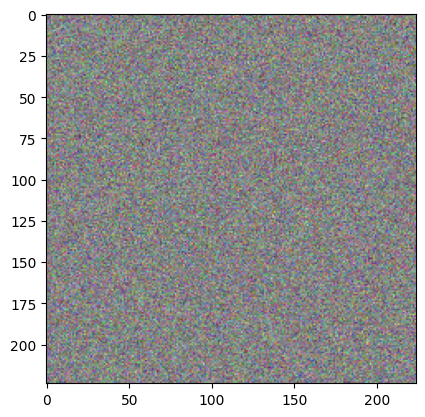

In [16]:
x = tf.Variable(tf.random.normal((1, 224, 224, 3)))

def normalize(img):
    return (img-tf.reduce_min(img))/(tf.reduce_max(img)-tf.reduce_min(img))

plt.imshow(normalize(x[0]))

Predicted class: 669 (mosquito_net)
Probability of predicted class = 0.05142441764473915


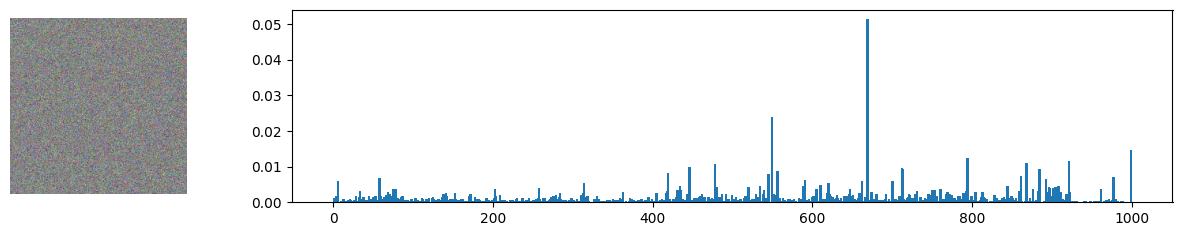

In [17]:
def plot_result(x):
    res = model(x)[0]
    cls = tf.argmax(res)
    print(f"Predicted class: {cls} ({classes[cls]})")
    print(f"Probability of predicted class = {res[cls]}")
    fig,ax = plt.subplots(1,2,figsize=(15,2.5),gridspec_kw = { "width_ratios" : [1,5]} )
    ax[0].imshow(normalize(x[0]))
    ax[0].axis('off')
    ax[1].bar(range(1000),res,width=3)
    plt.show()

plot_result(x)


In [20]:
target = [284]

def cross_entropy_loss(target,res):
    return tf.reduce_mean(keras.metrics.sparse_categorical_crossentropy(target,res))

def optimize(x,target,epochs=1000,show_every=None,loss_fn=cross_entropy_loss,eta=1.0):
    if show_every is None:
        show_every = epochs // 10
    for i in range(epochs):
        with tf.GradientTape() as t:
            res = model(x)
            loss = loss_fn(target,res)
            grads = t.gradient(loss,x)
            x.assign_sub(eta*grads)
            if i%show_every == 0:
                clear_output(wait=True)
                print(f"Epoch: {i}, loss: {loss}")
                plt.imshow(normalize(x[0]))
                plt.show()
optimize(x, target)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
plot_result(x)

In [ ]:
def total_loss(target, res):
    return 10*tf.reduce_mean(keras.metrics.sparse_categorical_crossentropy(target,res)) + 0.0005*tf.image.total_variation(x)

optimize(x, target, loss_fn=total_loss)

In [21]:
img = Image.open('images/dog-from-unsplash.jpg')
img = img.crop((200,20,600,420)).resize((224,224))
img = np.array(img)
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'images/dog-from-unsplash.jpg'

In [ ]:
plot_result(np.expand_dims(img,axis=0))

In [ ]:
x = tf.Variable(np.expand_dims(img,axis=0).astype(np.float32)/255.0)
optimize(x, target, epochs=100)

In [ ]:
plot_result(x)

In [ ]:
model = keras.applications.ResNet50(weights='imagenet',include_top=True)

In [ ]:
plot_result(x)